In [18]:
import timeit
import sys
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import numpy as np
import time
import unittest

# Q1 - factorial algorithm

Below is an iterative algorithm to compute the factorial of a positive number. The factorial of an integer n is defined as the product of the integers from 1 to n. 

__algorithm__ *factorial(n)*<br>
__input:__ n, a natural number<br>
__Output:__ the nth factorial number<br>
1: if *n* = 1 then<br>
2:    __return__ 1<br>
3: else<br>
4:    __return__ n* factorial(n-1)<br>
5: endif<br>

# Q2 - factorials

In the cell below is an iterative factorial function. This function takes the value n as an argument. The variable fact is initialised to the value of n. The function uses a while loop to iteratively decrease the value of n by 1 and assign fact to the value of fact multiplied by n. When the value of n is no longer greater than 1 the factorial value is returned. 

In [6]:
def iterative_fact(n):
    fact = n
    
    #while n is greater than zero decrement n 
    #multiply fact by n
    
    while n > 1:
        n -= 1
        fact = fact*n
    return fact

Below is a non-tail recursive algorithm to compute the factorial of n. As explained in lecture 6, a non-tail recursive function is one which still has further processing to do after the function returns. This is seen in the function below where an additional multiplication by n is performed after the recursive call is completed. This function takes n as an argument. If n is equal to 1 then the value 1 is returned. This is the base case and when it is reached no further function calls are made.  

In [9]:
def non_tail_recursive_fact(n):
    #this is the base case
    if n == 1:
        return 1
    else:
        #multiplication by n occurs after recursively calling the function
        return n*non_tail_recursive_fact(n-1)

Below is a tail-recursive algorithm to caculate the factorial of a number. Tail recursive means that any recursive call made within the function is the last thing executed by the function. The tail recursive function takes two arguments. The second argument accumulates the factorial value. When the base case is reached, the accumulator is returned. In the function below I have initialised the accumulator to 1. 

In [10]:
def tail_recursive_fact(n, acc = 1):
    
    #this is the base case
    if n == 1: 
        #return accumulator when base case reached
        return acc
    else:
        #recursively call the function giving it two arguments
        #second argument is accumulator
        return tail_recursive_fact(n-1, n*acc)
        

In the cell below I test that the factorial functions are working correctly. I compare the result returned by the function to known factorial values obtained from https://www.rapidtables.com/math/algebra/Factorial.html. True is returned if the correct value is returned. 

In [11]:
#loop through list of factorial functions
for function in [iterative_fact,non_tail_recursive_fact,tail_recursive_fact]:
    print("checking", function.__name__)
    print(function(1) == 1)
    print(function(5) == 120)
    print(function(12) == 479001600)

checking iterative_fact
True
True
True
checking non_tail_recursive_fact
True
True
True
checking tail_recursive_fact
True
True
True


### Time the factorial functions

In the cell below I have created a function called time_factorial to time the factorial functions implemented above using the timeit module. As described at https://docs.python.org/2/library/timeit.html, the timeit module takes a primary statement, a setup statement and the number of times to execute the primary statement.

The setup statement is executed only once. The primary statement refers to 'mycode' below and is set equal to a function and an argument. I have set the number equal to a variable called t. The value for t is passed as an argument to the time_factorial function. A single floating point value is returned by the time_factorial function representing the amount of time it took to execute the primary statement t times. I then divide each element in the list of times by t to get the time taken for a single iteration of the function. 

Two lists are created within the time_factorial function. n is a list of indexes and times is a list of times. As the function can only return one thing, a nested list is returned containing these two lists. 

As described at https://stackoverflow.com/questions/3323001/what-is-the-maximum-recursion-depth-in-python-and-how-to-increase-it, I have changed the recursion limit from pythons default value of 1000 to 2000 in order to investigate the running times further. 


# change range of function before submitting!

In [14]:
#change recursion limit
sys.setrecursionlimit(2000)

def time_factorial(func, t):

    #function name passed as string and concatenated to setup
    setup = "from __main__ import " + func
    
    #initalise empty lists for times and n
    times = []
    n = []
    
    for i in range(1,2000, 100):
        
        #append i to the list n
        n.append(i)
        mycode = func +"(" + str(i) + ")"
        times.append(timeit.timeit(setup = setup, 
                                  stmt = mycode, 
                                  number = t))
    
    #get time taken for a single iteration of the factorial 
    fact_times = [x/t for x in times]
    
    #return a list containing the lists n and fact_times
    return [n, fact_times]



In the cell below I create a function to check that the time_factorial function is working correctly. I implement the time.sleep function (as described at https://docs.python.org/3/library/time.html) to check that the time measured by the time_factorial function is equal to the length of time given to the time.sleep method. 


In [15]:
def sleep(a):
    time.sleep(0.1)
    return 

In [16]:
time_test = time_factorial("sleep",1)
print("Testing that function sleeps for 0.1 seconds:")
print(time_test[1])

Testing that function sleeps for 0.1 seconds:
[0.10269381700004487, 0.10358619499993438, 0.10505552799997986, 0.10505387500006691, 0.10106165900003816, 0.10300676700001077, 0.10049966299993685, 0.10505427600003259, 0.10177751600008378, 0.10248400599994056, 0.1038034590000052, 0.10495265999998082, 0.10505470800001149, 0.1019125970000232, 0.10505396199994266, 0.103903124999988, 0.10362474999999449, 0.10291402999996535, 0.10226599499992517, 0.10381253299999571]


I can see above that the function is sleeping for 0.1 seconds. The inaccurracy is most likely due to other operations being carried out within the time_factorial function. This test tells me that the time_factorial function is working correctly. 

### Plotting the factorial functions

In the cell below the time_factorial function is called for each of the three factorial functions defined above. The name of the factorial function being timed is passed as a string to the time_factorial function. It is passed as a string as the setup statement requires a string. The second argument passed is the variable t in the time_factorial function. The specifies how many times each iteration is to be executed and timed. 

A dictionary is created to store the results returned from the time_factorial function. For each of the three factorial functions, the name of the function is a key in the dictionary and the value for each key is the list returned by the time_factorial function. This list comprises two lists, one for n and one for the times. 

In [9]:
#create dictionary
fact_times = {}

In [10]:
#call the time_factorial function for each of the factorial functions. 
#t will be assigned the value of 1000
fact_times["iterative_list"] = time_factorial("iterative_fact", 1000)
fact_times["non_tail_list"] = time_factorial("non_tail_recursive_fact", 1000)
fact_times["tail_list"] = time_factorial("tail_recursive_fact", 1000)

In the cell below I iterate through the dictionary created above in order to plot each of the factorial functions. For each key in the dictionary I create a variable l which is assigned to the value of that key. l is a list of two lists which I then index in order to plot n on the x axis and times on the y axis. 

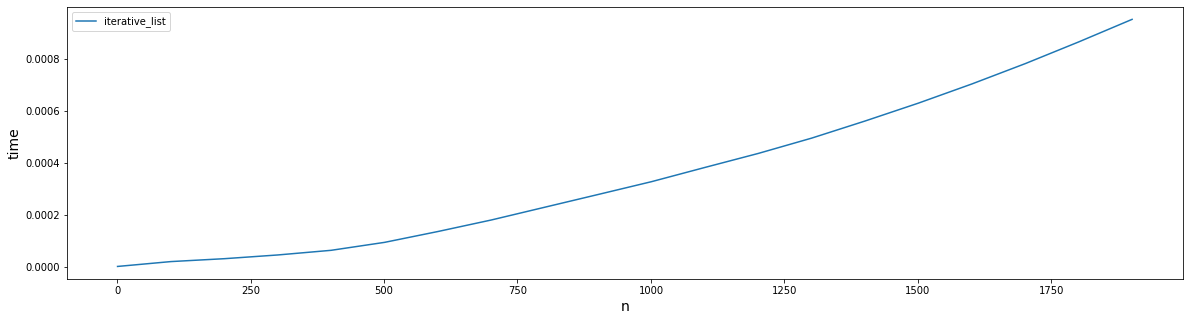

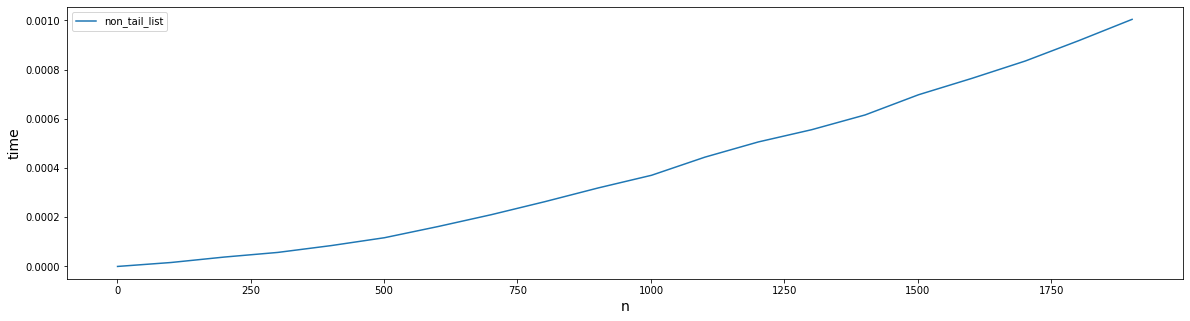

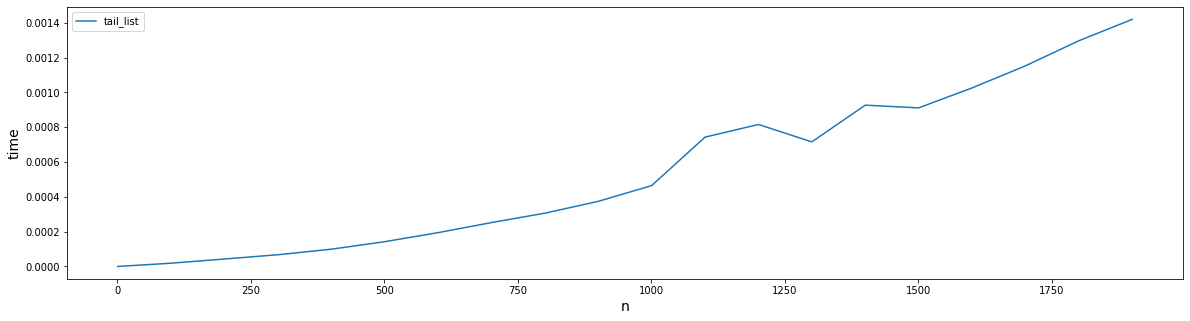

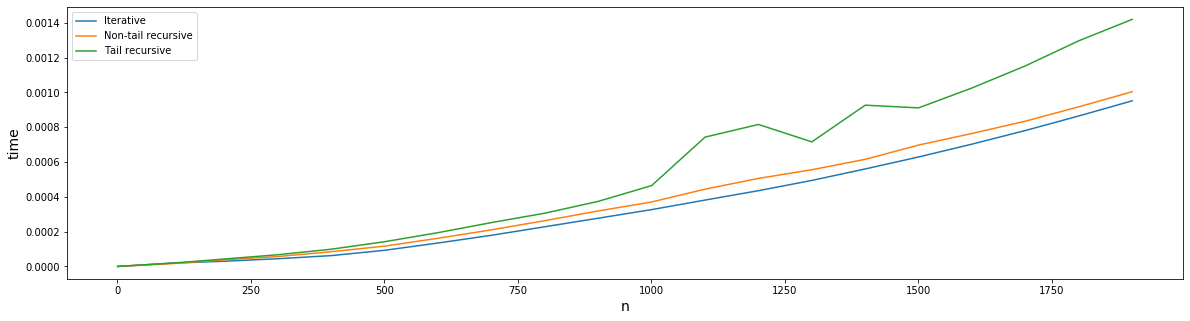

In [13]:
#s is key of the dict
for s in fact_times:

    #l is the value of the key
    l = fact_times[s]

    plt.figure(figsize=(20,5))
    #index the list
    plt.plot(l[0],l[1], label = s)
    #add labels 
    plt.xlabel('n',fontsize =14)
    plt.ylabel('time',fontsize =14)
    #show legend
    plt.legend()
    #show plot
    plt.show()



plt.figure(figsize=(20,5))
#plot functions
plt.plot(fact_times["iterative_list"][0],fact_times["iterative_list"][1], label = 'Iterative')
plt.plot(fact_times["non_tail_list"][0],fact_times["non_tail_list"][1], label = 'Non-tail recursive')
plt.plot(fact_times["tail_list"][0],fact_times["tail_list"][1], label = 'Tail recursive')
#add labels 
plt.xlabel('n',fontsize =14)
plt.ylabel('time',fontsize =14)
# #show legend
plt.legend()
# #show plot
plt.show()



iterative slower because recursion makes calls which takes time and space. Tail is better but slower because takes more memory etc 

optomisation arch for each compiler for ints? change to float to get linear line

bigOn^3
MORE

# Q3 Search algorithms

In the cell below I have implemented a linear search algorithm. This algorithm loops through an array and checks to see if each element in the array is equal to the target. True is returned if the target is found. 

In [38]:
def linear_search(arr, target):
    
    for i in range(len(arr)):
        if arr[i] == target:
            return True
    return False
    

As described at https://docs.python.org/3.7/library/unittest.html and in lab 4, I have implemented unit testing in the cell below. This test is to ensure that the linear search function is working correctly. 

In [42]:
class TestLinearSearch(unittest.TestCase):
    
    def test_empty_list(self):
        self.assertEqual(linear_search([], 3), False)
    
    def test_not_found(self):
        self.assertEqual(linear_search([1, 2], 3), False)
        
    def test_found(self):
        self.assertEqual(linear_search([1, 2, 3, 4], 3), True)
        self.assertEqual(linear_search([1, 2, 3, 4, 5, 6, 7], 7), True)
        
unittest.main(argv=[''], verbosity=2, exit=False)

test_empty_list (__main__.TestBinarySearch) ... ok
test_found (__main__.TestBinarySearch) ... ok
test_not_found (__main__.TestBinarySearch) ... ok
test_empty_list (__main__.TestLinearSearch) ... ok
test_found (__main__.TestLinearSearch) ... ok
test_not_found (__main__.TestLinearSearch) ... ok

----------------------------------------------------------------------
Ran 6 tests in 0.021s

OK


Below I have implemented a binary search algorithm. This algorithm searches a sorted sequence and repeatedly divides what is to be searched in half. Initially, this algorithm checks if the mid point is equal to the target. If the target is less than the mid point, it then recursively calls the function on the lower half of the sequence. If the target is greater than the mid point, it then recursively calls the function on the upper half of the sequence. This algorithm is logn. 

I have initialised high to None as I could not assign high to the length of arr within the function call. Within the function I then change high to the length of the array.

In [17]:
def binary_search(arr, target, low = 0, high = None):

    #set high equal to the length of the array -1
    if high is None: 
        high = len(arr)-1
    if low > high:
        return False
    else:
        mid = (low + high)//2
        if target == arr[mid]:
            return True
        elif target < arr[mid]:
            return binary_search(arr, target, low, mid-1)
        else:
            return binary_search(arr, target, mid + 1, high)
    

In the cell below is unit testing for the binary search algorithm.

In [41]:
class TestBinarySearch(unittest.TestCase):
    
    def test_empty_list(self):
        self.assertEqual(binary_search([], 3), False)
        
    def test_not_found(self):
        self.assertEqual(binary_search([1, 2], 3), False)
        
    def test_found(self):
        self.assertEqual(binary_search([1, 2, 3, 4], 3), True)
        self.assertEqual(binary_search([1, 2, 3, 4, 5, 6, 7], 7), True)
        
unittest.main(argv=[''], verbosity=2, exit=False)

test_empty_list (__main__.TestBinarySearch) ... ok
test_found (__main__.TestBinarySearch) ... ok
test_not_found (__main__.TestBinarySearch) ... ok
test_empty_list (__main__.TestLinearSearch) ... ok
test_found (__main__.TestLinearSearch) ... ok
test_not_found (__main__.TestLinearSearch) ... ok

----------------------------------------------------------------------
Ran 6 tests in 0.027s

OK


# Q4 Compute best and worst running times

In the cell below I have created a sequence of factorials to use as input for the linear search and recursive binary search algorithms defined above. Binary search algorithms only work for sorted arrays. The input given below is already sorted. 

In [47]:
#create array of factorials to use as input for linear and binary search
factorial_sequence = [iterative_fact(i) for i in range(1, 1000)]

As I did in Q2 for the factorial functions, in the cell below I have created a function called search_timer which uses timeit to measure how long it takes to execute the search algorithms defined above. 

search_timer takes a function, an array and an index value as arguments. In order to be able to use the middle element as the index for the best case binary search I have added a conditional statement. If the index given as an argument to the function is equal to the string "binarybest" then the index is assigned within the function. 

In order to investigate the best and worst running times for both of the search algorithms, I loop through the array and with each iteration of the for loop I decrease the length of the array by 10. 

In [51]:
def search_timer(func, arr, idx):
    setup = "from __main__ import " + func
    
    #create empty lists for n and times
    time_list = []
    n = []
    
    #if idx is equal to this string then binbest is True
    if idx == "binarybest":
        binbest = True
    else:
        binbest = False
    for i in range(len(arr), 0, -10):
        
        #if binbest is True then set idx equal to the middle element. 
        if binbest:
            idx = (len(arr[:i])-1)//2
        n.append(i) 
        mycode = func + "(" + str(arr[:i]) + "," + str(arr[:i][idx]) + ")"
        time_list.append(timeit.timeit(setup = setup, 
                                  stmt = mycode, 
                                  number = 10000))

    div = 10000
    binary_times = [x/div for x in time_list]  
    return [n, binary_times]


The best case for this algorithm would be if the target was the mid point of the sequence. The worst case would be if the target is at either end of the sequence as these would be the last to be compared to the target. 


In the cell below I have created a dictionary to store the results returned from the search_timer function. Each search is a key in the dictionary and the value for each key is the list returned by the search_timer function. This list comprises two lists, one for n and one for the times. 

In [52]:
#create dictionary
search_times = {}

### The best and worst cases

For the linear search algorithm, the worst case is if the target is the last element in the array as the function iterates through each element from the start. In this case the entire array would be iterated through before finding the target. The best case would be if the target was the first element. This is because the target would be found in the first iteration of the loop. 

In [53]:
#to compute the worst case search for index -1 in the array
search_times["linear_worstcase"] = search_timer("linear_search", factorial_sequence, -1)

#to compute the best case search for index 0 in the array
search_times["linear_bestcase"] = search_timer("linear_search", factorial_sequence, 0)

For the binary search algorithm, the worst case is if the target is the last element in the sequence. This is because this will require the maximum number of comparisons before the target is found. The best case would be if the target was the middle element. This is because it would be found on the first comparison within the function regardless of the length of the function. 

In [54]:
search_times["binary_worstcase"] = search_timer("binary_search", factorial_sequence, -1)

In [55]:
search_times["binary_bestcase"] = search_timer("binary_search", factorial_sequence, "binarybest")

In the cell below I iterate through the search_times dictionary created above in order to plot each of the linear and binary search functions. For each key in the dictionary I create a variable l which is assigned to the value of that key. l is a list of two lists which I then index in order to plot n on the x axis and times on the y axis. 

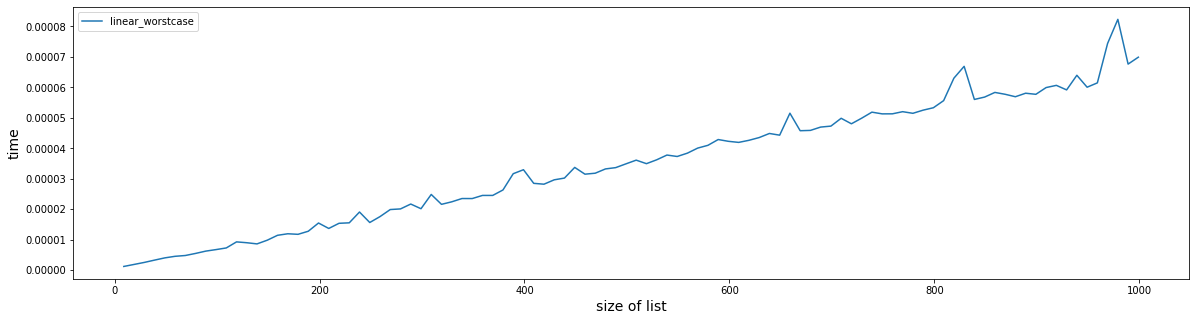

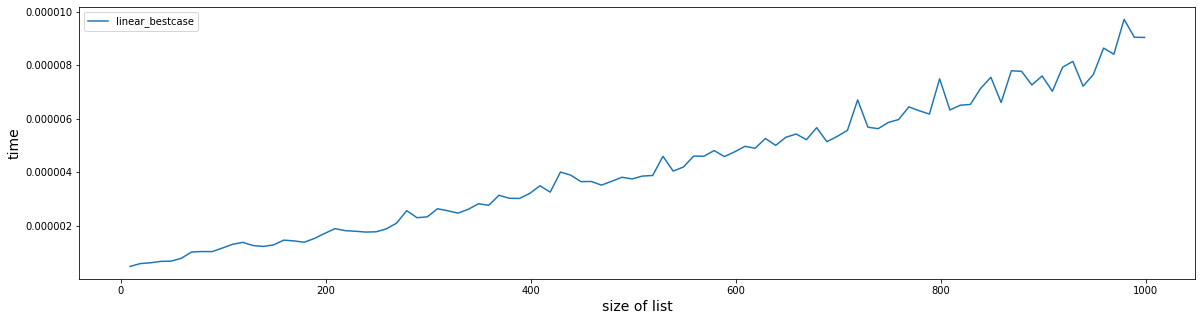

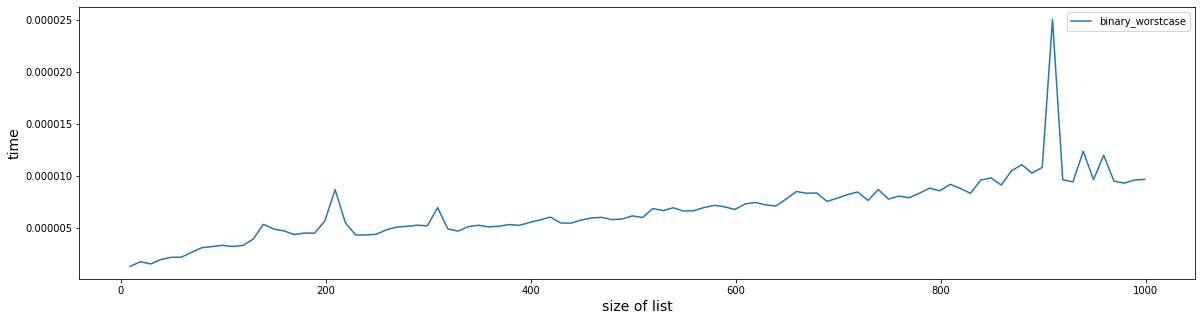

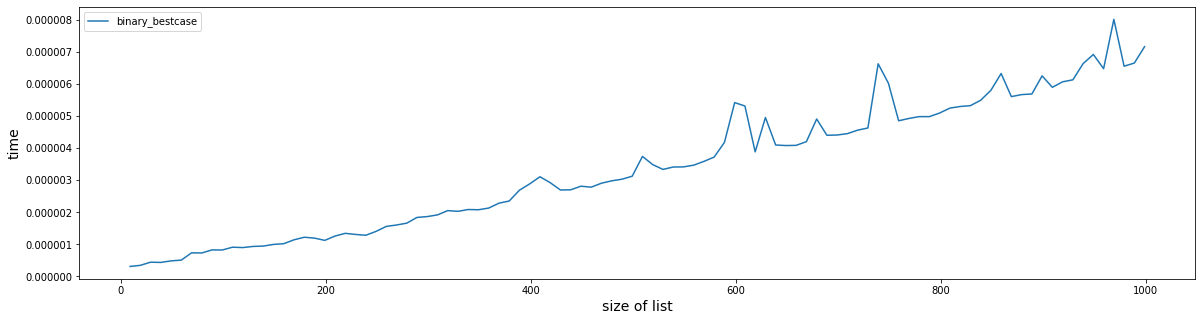

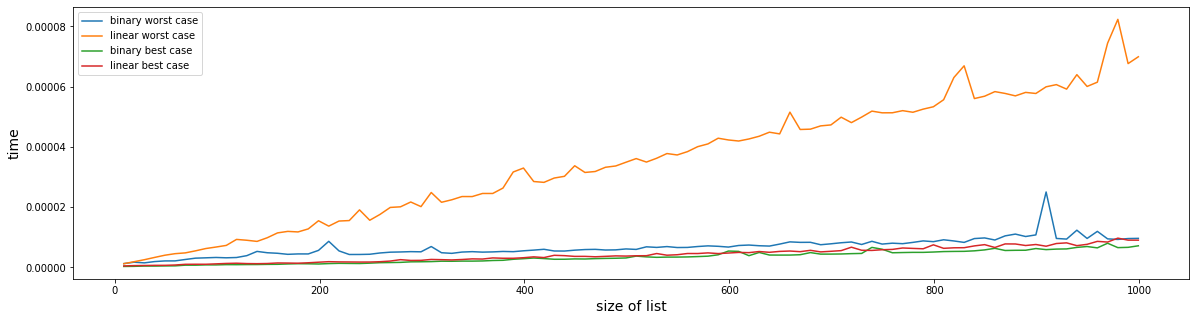

In [56]:
#s is key of the dict
for s in search_times:

    #l is the value of the key
    l = search_times[s]
    
    plt.figure(figsize=(20,5))
    plt.plot(l[0], l[1], label = s)
    plt.xlabel('size of list',fontsize =14)
    plt.ylabel('time',fontsize =14)
    plt.legend()
    plt.show()

plt.figure(figsize=(20,5))
plt.plot(search_times["binary_worstcase"][0], search_times["binary_worstcase"][1], label = 'binary worst case')
plt.plot(search_times["linear_worstcase"][0], search_times["linear_worstcase"][1], label = 'linear worst case')
plt.plot(search_times["binary_bestcase"][0], search_times["binary_bestcase"][1], label = 'binary best case')
plt.plot(search_times["linear_bestcase"][0], search_times["linear_bestcase"][1], label = 'linear best case')
plt.xlabel('size of list',fontsize =14)
plt.ylabel('time',fontsize =14)
plt.legend()
plt.show()

#expected results: 
#linear worst case linear On
#binary worst case log
#binary best and linear best constant

# Q5 Curve-fitting algorithms

In the cells below I use curve fitting algorithms to find the equation of the running times obtained in the questions above. As described at https://www.youtube.com/watch?v=4vryPwLtjIY and https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html, I have implemented scipy.optomise curve_fit. 

In order to fully explore the best fit of the algorithms, I do a linear, quadratic and polynomial fit for each of the search algorithms and then each of the factorials. A discussion of my findings follows below. 

In [24]:
def linear_fit_func(x, a, b):
    return a*x + b

def quadratic_fit(x, a, b, c):
    return a*x**2 + b*x + c

def polynomial_fit_func(x, a, b, c, d):
    return a*x**3 + b*x**2 + c*x + d

In the cell below I have created a function called fit_plot. This function takes a function name and a dictionary as arguments. fit_plot then loops through the keys in the dictionary. The dictionary values are indexed and the values for n and times are passed to the curve_fit function. The curve fits are then plotted. 

In [25]:
def fit_plot(func, values_dict):

    #loop through the keys in the dictionary
    for s in values_dict:
        #l is the value of each key
        l = values_dict[s]
        
        #index l to create variable x and y
        x = np.array(l[0])
        y = np.array(l[1])

        #pass the function and the values of x and y to curve_fit
        c, cov = curve_fit(func, x, y)

        plt.figure(figsize=(20,5))
        plt.plot(x,y, label = s)
        plt.plot(x,func(x, *c), label = 'best fit')
        plt.xlabel('size of list',fontsize =14)
        plt.ylabel('time',fontsize =14)
        plt.legend()
        plt.show()

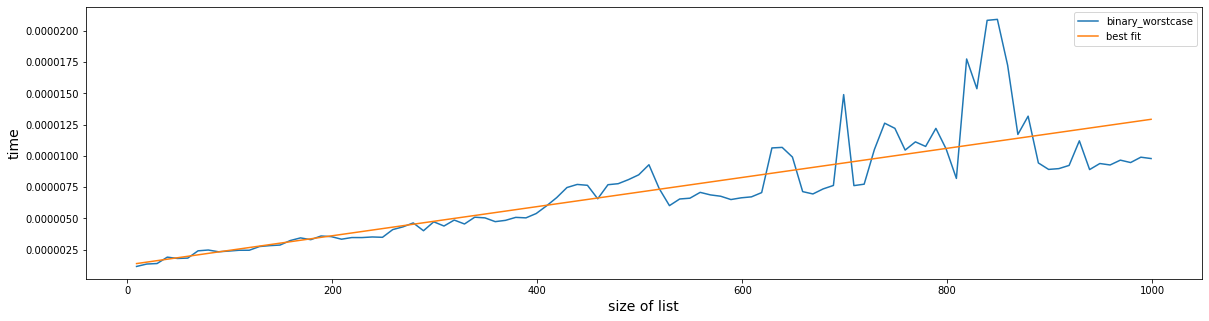

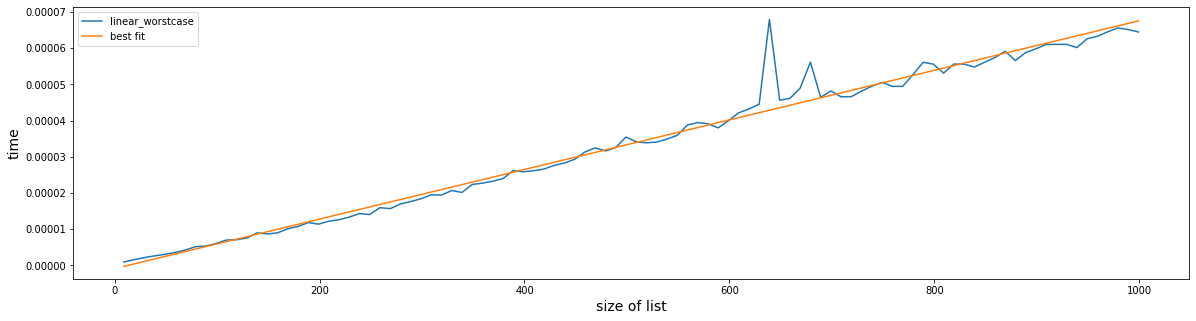

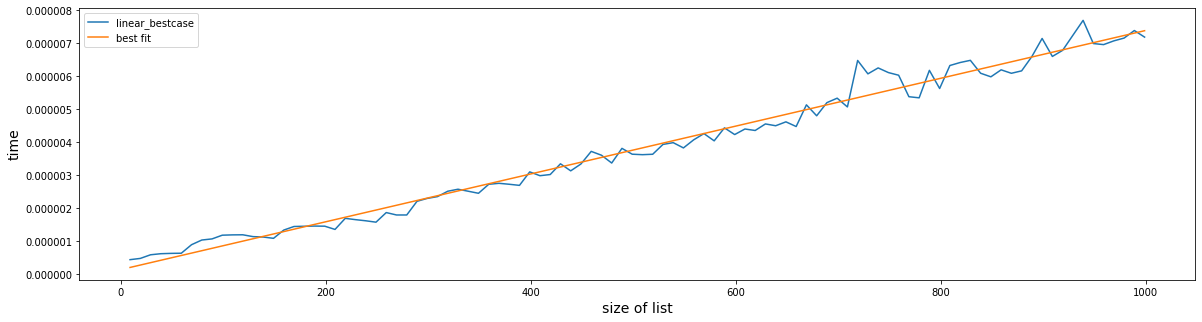

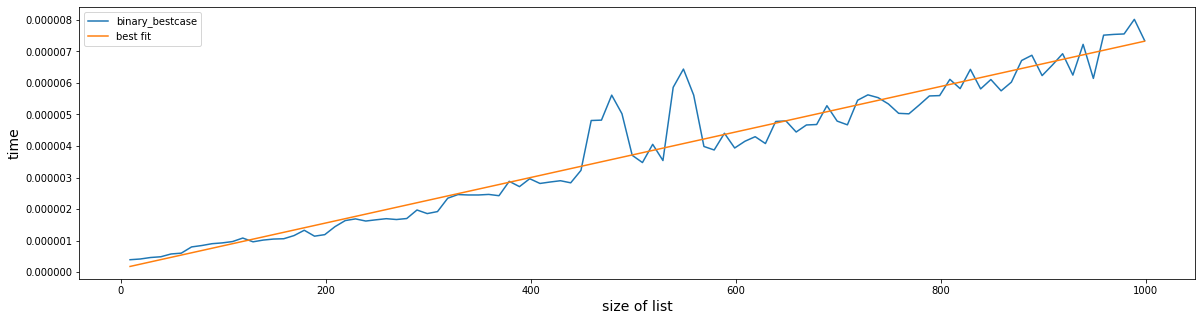

In [26]:
fit_plot(linear_fit_func,search_times)

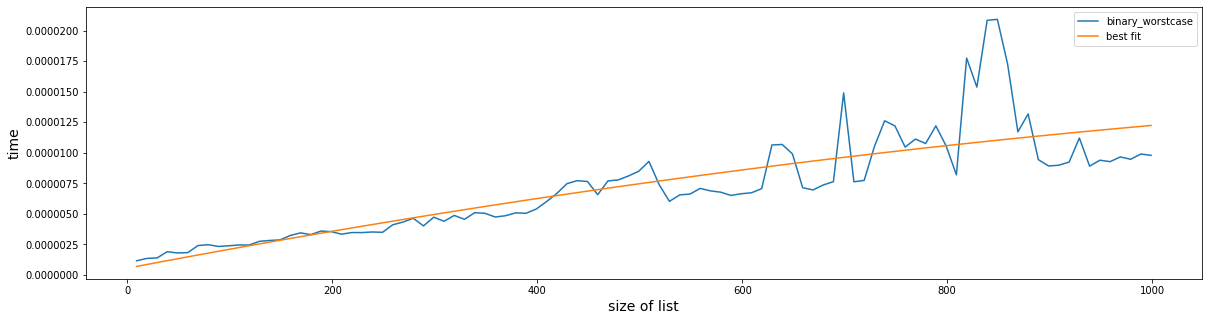

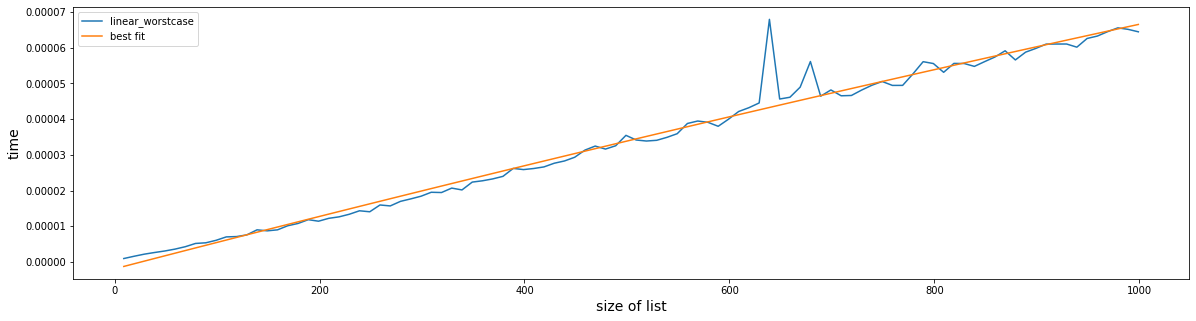

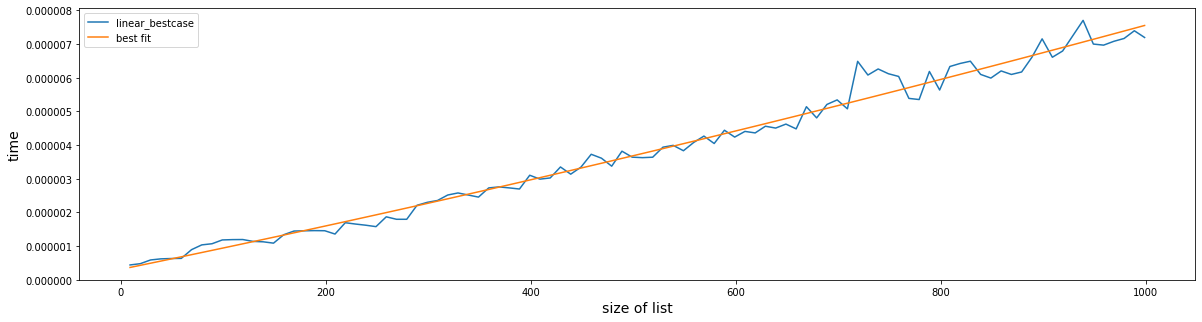

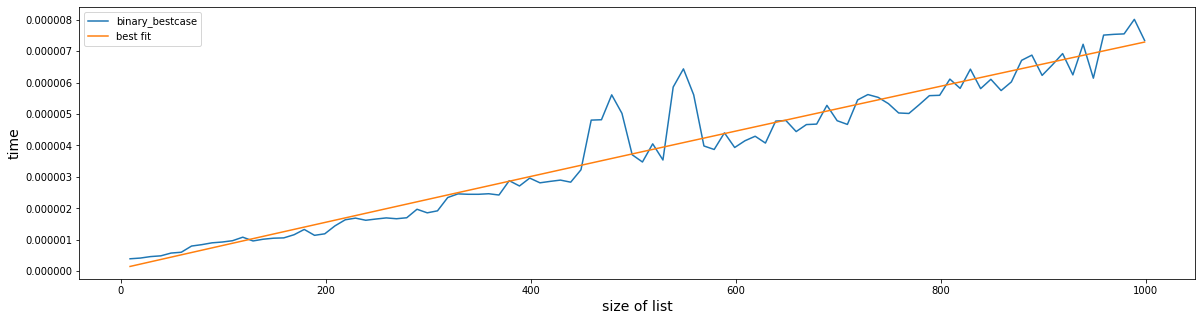

In [27]:
fit_plot(quadratic_fit,search_times)

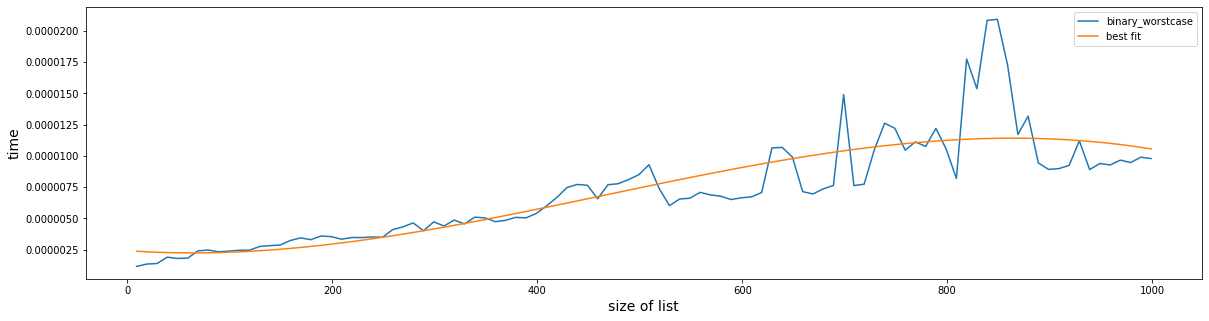

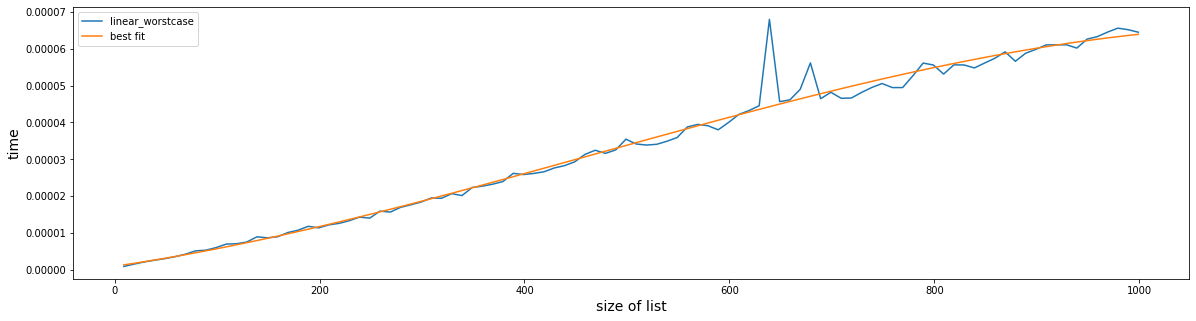

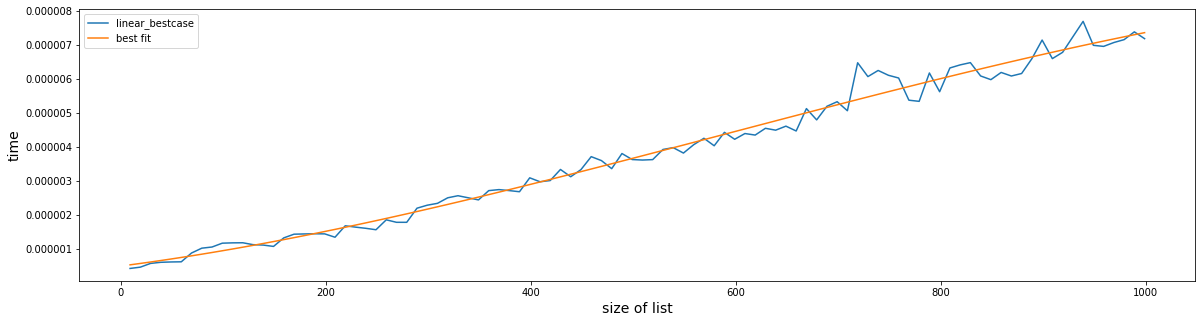

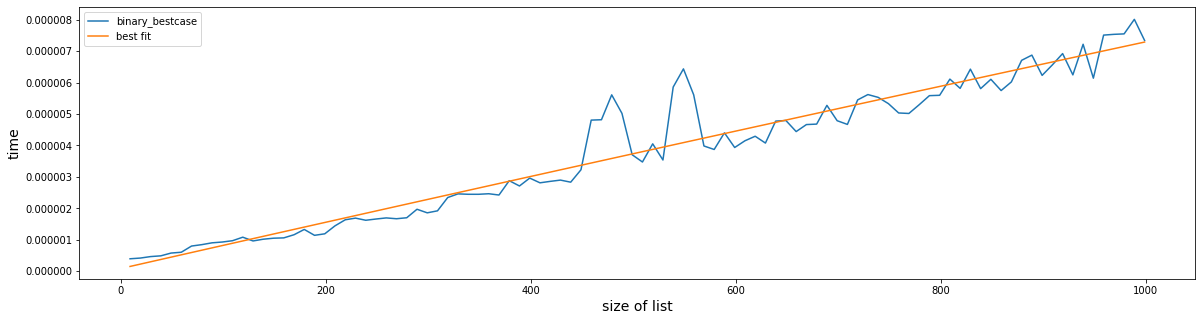

In [28]:
fit_plot(polynomial_fit_func,search_times)

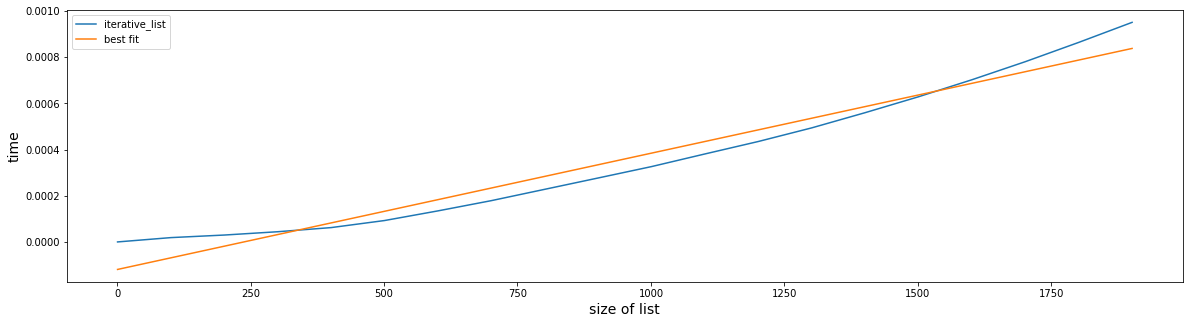

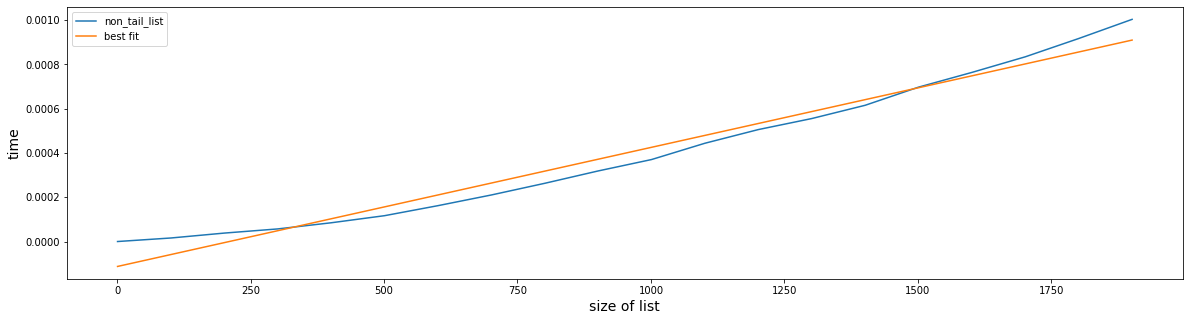

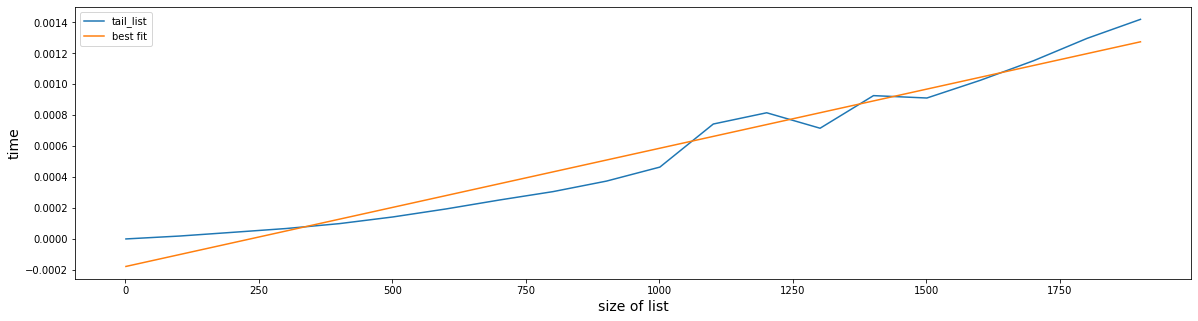

In [29]:
#linear fit for all factorials
fit_plot(linear_fit_func,fact_times)

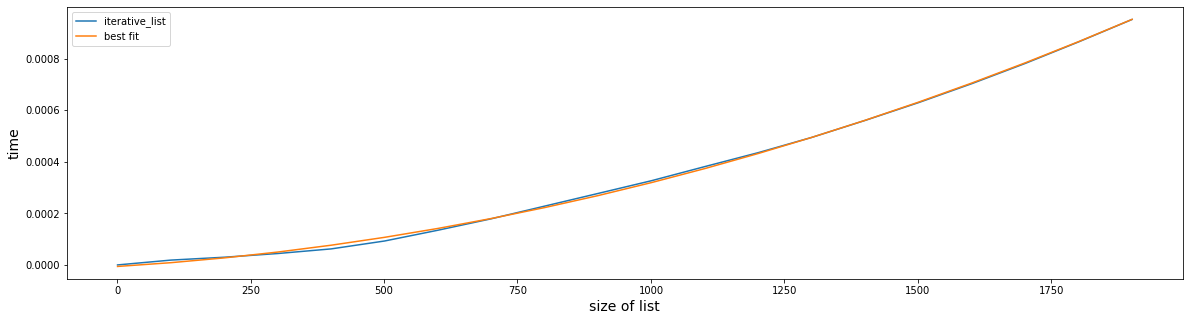

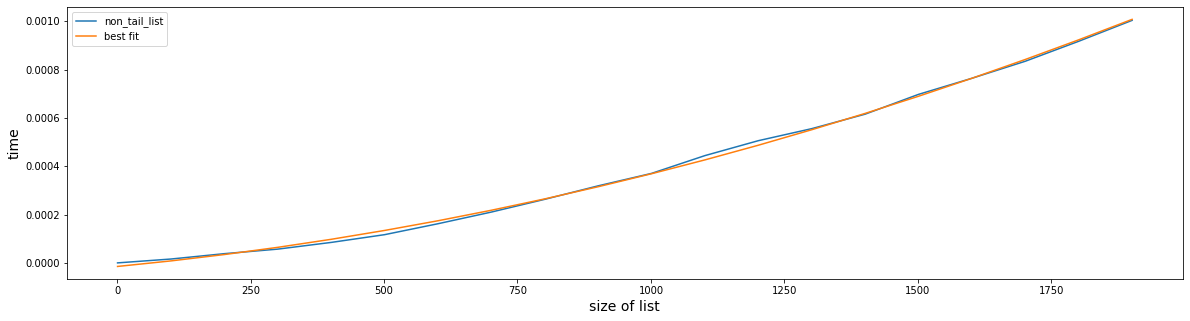

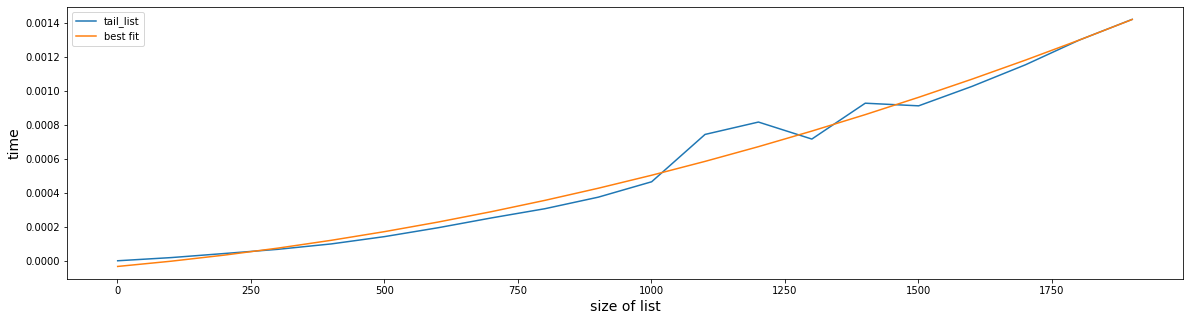

In [30]:
fit_plot(quadratic_fit,fact_times)

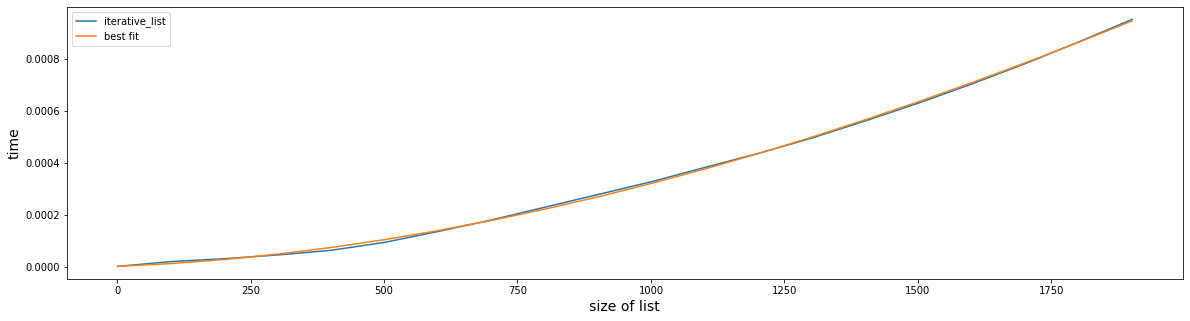

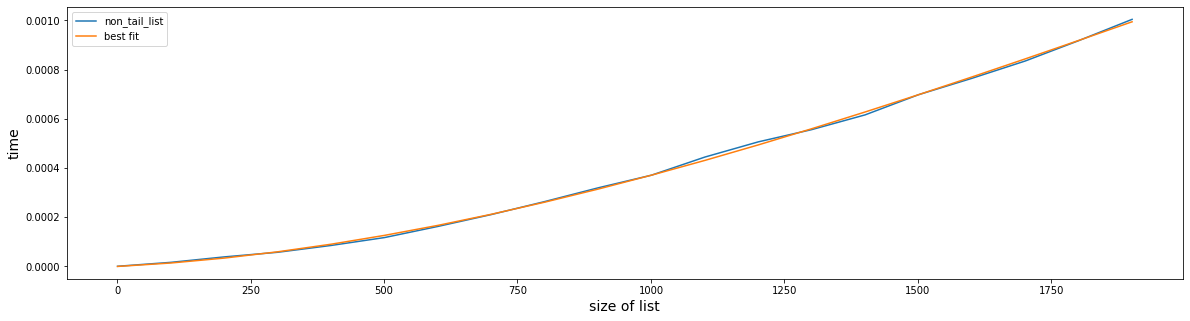

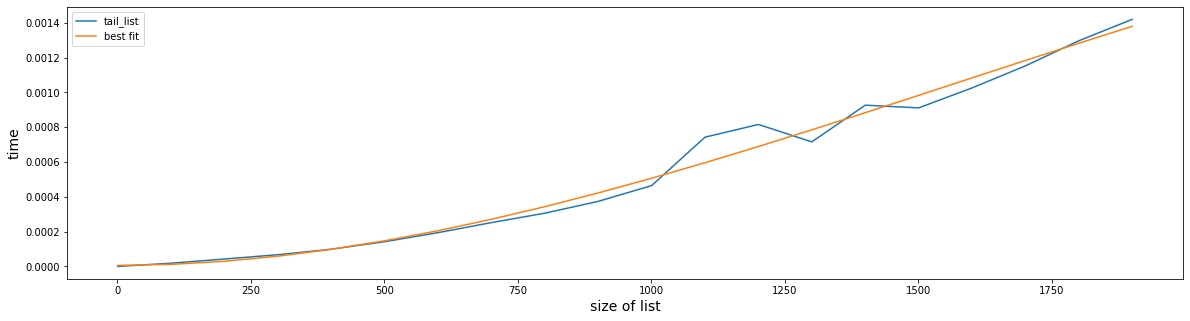

In [31]:
fit_plot(polynomial_fit_func,fact_times)

In [32]:
#extraploite x range 100000
#refactoring code
#add testing to make sure factorial is getting the expected result - test the search functions!!!!